In [29]:
var openDigger = require('../src/open_digger');

var query = openDigger.driver.clickhouse.query;

In [76]:
console.log('葛进_周文格小组 分析项目为atom/atom');

葛进_周文格小组 分析项目为atom/atom


In [15]:
query(`SHOW DATABASES`).then(res=>{console.log(res);})

[
  { name: '_temporary_and_external_tables' },
  { name: 'default' },
  { name: 'github_log' },
  { name: 'system' }
]


任务1.1
月份: 2015-01
当月新增Star: 11967
月份: 2015-02
当月新增Star: 915
月份: 2015-03
当月新增Star: 12847
月份: 2015-04
当月新增Star: 1896
月份: 2015-05
当月新增Star: 13869
月份: 2015-06
当月新增Star: 4026
月份: 2015-07
当月新增Star: 15031
月份: 2015-08
当月新增Star: 4717
月份: 2015-09
当月新增Star: 15759
月份: 2015-10
当月新增Star: 5489
月份: 2015-11
当月新增Star: 16809
月份: 2015-12
当月新增Star: 6390
月份: 2016-01
当月新增Star: 17977
月份: 2016-02
当月新增Star: 7229
月份: 2016-03
当月新增Star: 18976
月份: 2016-04
当月新增Star: 8191
月份: 2016-05
当月新增Star: 19614
月份: 2016-06
当月新增Star: 9195
月份: 2016-07
当月新增Star: 20232
月份: 2016-08
当月新增Star: 10125
月份: 2016-09
当月新增Star: 21029
月份: 2016-10
当月新增Star: 10970
月份: 2016-11
当月新增Star: 21813
月份: 2016-12
当月新增Star: 11684
月份: 2017-01
当月新增Star: 22639
月份: 2017-02
当月新增Star: 12475
月份: 2017-03
当月新增Star: 23407
月份: 2017-04
当月新增Star: 13071
月份: 2017-05
当月新增Star: 23593
月份: 2017-06
当月新增Star: 14005
月份: 2017-07
当月新增Star: 24374
月份: 2017-08
当月新增Star: 15249
月份: 2017-09
当月新增Star: 25296
月份: 2017-10
当月新增Star: 16012
月份: 2017-11
当月新增Star: 26007
月份: 2017-12
当月新增Star: 16

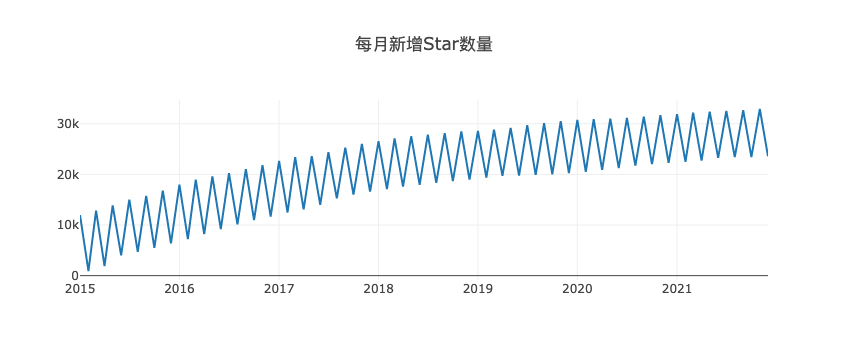

In [37]:
var startYear = 2015,
  endYear = 2021;
var years = [];
var repo_id = 3228505;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('任务1.1');
Promise.all(
  years.map((year) => {
    return query(`
    select created_at, repo_stargazers_count
    from github_log.events
    where repo_id=${repo_id} and type = 'PullRequestEvent' and toYear (created_at) = ${year}
    `);
  })
).then((data) => {
  const tmp = {};
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      tmp[data[i][j].created_at.slice(0, 7)] = Number(
        data[i][j].repo_stargazers_count
      );
    }
  }
  const ordered = Object.fromEntries(Object.entries(tmp).sort());
  let timeArray = [];
  let countArray = [];
  for (const key in ordered) {
    timeArray.push(key);
    countArray.push(ordered[key]);
  }
  for (let i = 1; i < countArray.length; i++) {
    countArray[i] -= countArray[i - 1]; // count every month add
  }
  for(let i = 0; i < timeArray.length; i++) {
      console.log('月份: ' + timeArray[i]);
      console.log('当月新增Star: ' + countArray[i]);
  }
  var data = [
    {
      x: timeArray,
      y: countArray,
      type: "scatter",
    },
  ];
  openDigger.render.plotly(data, { title: "每月新增Star数量" });
});

任务1.2
月份: 2015-01
当月新增Fork: 2006
月份: 2015-02
当月新增Fork: 151
月份: 2015-03
当月新增Fork: 2214
月份: 2015-04
当月新增Fork: 349
月份: 2015-05
当月新增Fork: 2445
月份: 2015-06
当月新增Fork: 684
月份: 2015-07
当月新增Fork: 2598
月份: 2015-08
当月新增Fork: 773
月份: 2015-09
当月新增Fork: 2652
月份: 2015-10
当月新增Fork: 988
月份: 2015-11
当月新增Fork: 2734
月份: 2015-12
当月新增Fork: 1282
月份: 2016-01
当月新增Fork: 2878
月份: 2016-02
当月新增Fork: 1419
月份: 2016-03
当月新增Fork: 3061
月份: 2016-04
当月新增Fork: 1597
月份: 2016-05
当月新增Fork: 3152
月份: 2016-06
当月新增Fork: 1743
月份: 2016-07
当月新增Fork: 3294
月份: 2016-08
当月新增Fork: 1914
月份: 2016-09
当月新增Fork: 3434
月份: 2016-10
当月新增Fork: 2103
月份: 2016-11
当月新增Fork: 3576
月份: 2016-12
当月新增Fork: 2218
月份: 2017-01
当月新增Fork: 3727
月份: 2017-02
当月新增Fork: 2378
月份: 2017-03
当月新增Fork: 3843
月份: 2017-04
当月新增Fork: 2489
月份: 2017-05
当月新增Fork: 3979
月份: 2017-06
当月新增Fork: 2567
月份: 2017-07
当月新增Fork: 4195
月份: 2017-08
当月新增Fork: 2962
月份: 2017-09
当月新增Fork: 4503
月份: 2017-10
当月新增Fork: 3214
月份: 2017-11
当月新增Fork: 4787
月份: 2017-12
当月新增Fork: 3474
月份: 2018-01
当月新增Fork: 4972


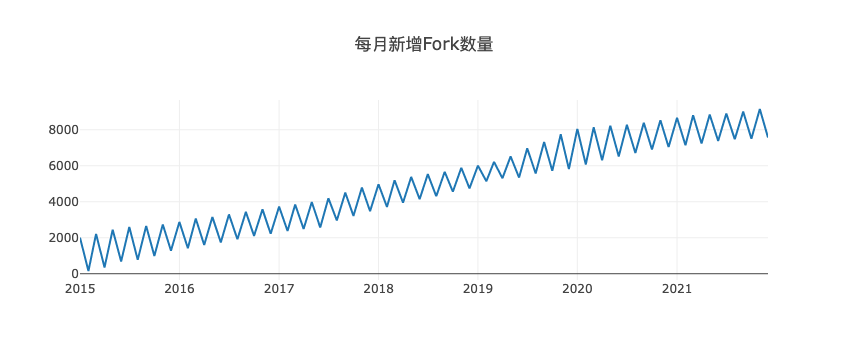

In [38]:
var startYear = 2015,
  endYear = 2021;
var years = [];
var repo_id = 3228505;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('任务1.2');
Promise.all(
  years.map((year) => {
    return query(`
    select created_at, repo_forks_count
    from github_log.events
    where repo_id=${repo_id} and type = 'PullRequestEvent' and toYear (created_at) = ${year}
    `);
  })
).then((data) => {
  const tmp = {};
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      tmp[data[i][j].created_at.slice(0, 7)] = Number(
        data[i][j].repo_forks_count
      );
    }
  }
  const ordered = Object.fromEntries(Object.entries(tmp).sort());
  let timeArray = [];
  let countArray = [];
  for (const key in ordered) {
    timeArray.push(key);
    countArray.push(ordered[key]);
  }
  for (let i = 1; i < countArray.length; i++) {
    countArray[i] -= countArray[i - 1];
  }
  for (let i = 0; i < timeArray.length; i++) {
    console.log("月份: " + timeArray[i]);
    console.log("当月新增Fork: " + countArray[i]);
  }
  var data = [
    {
      x: timeArray,
      y: countArray,
      type: "scatter",
    },
  ];
  openDigger.render.plotly(data, { title: "每月新增Fork数量" });
});

任务2.1
月份: 2014-05
当月打开Issue: 3
月份: 2014-06
当月打开Issue: 1
月份: 2014-07
当月打开Issue: 4
月份: 2014-08
当月打开Issue: 4
月份: 2014-10
当月打开Issue: 2
月份: 2014-11
当月打开Issue: 6
月份: 2014-12
当月打开Issue: 9
月份: 2015-01
当月打开Issue: 135
月份: 2015-02
当月打开Issue: 174
月份: 2015-03
当月打开Issue: 165
月份: 2015-04
当月打开Issue: 180
月份: 2015-05
当月打开Issue: 182
月份: 2015-06
当月打开Issue: 176
月份: 2015-07
当月打开Issue: 222
月份: 2015-08
当月打开Issue: 164
月份: 2015-09
当月打开Issue: 181
月份: 2015-10
当月打开Issue: 144
月份: 2015-11
当月打开Issue: 170
月份: 2015-12
当月打开Issue: 99
月份: 2016-01
当月打开Issue: 121
月份: 2016-02
当月打开Issue: 172
月份: 2016-03
当月打开Issue: 151
月份: 2016-04
当月打开Issue: 152
月份: 2016-05
当月打开Issue: 90
月份: 2016-06
当月打开Issue: 81
月份: 2016-07
当月打开Issue: 82
月份: 2016-08
当月打开Issue: 150
月份: 2016-09
当月打开Issue: 153
月份: 2016-10
当月打开Issue: 175
月份: 2016-11
当月打开Issue: 91
月份: 2016-12
当月打开Issue: 82
月份: 2017-01
当月打开Issue: 99
月份: 2017-02
当月打开Issue: 83
月份: 2017-03
当月打开Issue: 105
月份: 2017-04
当月打开Issue: 95
月份: 2017-05
当月打开Issue: 111
月份: 2017-06
当月打开Issue: 94
月份: 2017-07
当月打开Iss

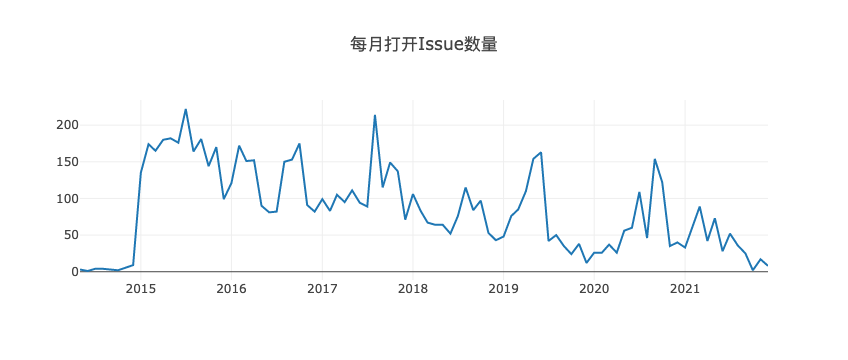

In [39]:
var startYear = 2015,
  endYear = 2021;
var years = [];
var repo_id = 3228505;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('任务2.1');
Promise.all(
  years.map((year) => {
    return query(`
    select issue_created_at
    from github_log.events
    where repo_id=${repo_id} and type = 'PullRequestEvent' and toYear (created_at) = ${year}
    `);
  })
).then((data) => {
  const tmp = {};
  let issumeAverageDuration = 0;
  for(let i = 0; i < data.length; i++) {
      for(let j = 0; j < data[i].length; j++) {
          if (tmp.hasOwnProperty(data[i][j].issue_created_at.slice(0, 7))) {
        tmp[data[i][j].issue_created_at.slice(0, 7)] += 1;
      } else {
        tmp[data[i][j].issue_created_at.slice(0, 7)] = 1;
      }
      }
  }
  const ordered = Object.fromEntries(Object.entries(tmp).sort());
  let timeArray = [];
  let countArray = [];
  for (const key in ordered) {
    timeArray.push(key);
    countArray.push(ordered[key]);
  }
    for (let i = 0; i < timeArray.length; i++) {
    console.log("月份: " + timeArray[i]);
    console.log("当月打开Issue: " + countArray[i]);
  }
  var data = [
    {
      x: timeArray,
      y: countArray,
      type: 'scatter'
    },
  ];
  openDigger.render.plotly(data, {title: '每月打开Issue数量'});
});

任务2.2
月份: 2015-01
当月关闭Issue: 62
月份: 2015-02
当月关闭Issue: 85
月份: 2015-03
当月关闭Issue: 79
月份: 2015-04
当月关闭Issue: 92
月份: 2015-05
当月关闭Issue: 78
月份: 2015-06
当月关闭Issue: 91
月份: 2015-07
当月关闭Issue: 107
月份: 2015-08
当月关闭Issue: 72
月份: 2015-09
当月关闭Issue: 80
月份: 2015-10
当月关闭Issue: 63
月份: 2015-11
当月关闭Issue: 74
月份: 2015-12
当月关闭Issue: 35
月份: 2016-01
当月关闭Issue: 74
月份: 2016-02
当月关闭Issue: 87
月份: 2016-03
当月关闭Issue: 80
月份: 2016-04
当月关闭Issue: 65
月份: 2016-05
当月关闭Issue: 45
月份: 2016-06
当月关闭Issue: 37
月份: 2016-07
当月关闭Issue: 34
月份: 2016-08
当月关闭Issue: 77
月份: 2016-09
当月关闭Issue: 97
月份: 2016-10
当月关闭Issue: 71
月份: 2016-11
当月关闭Issue: 44
月份: 2016-12
当月关闭Issue: 46
月份: 2017-01
当月关闭Issue: 57
月份: 2017-02
当月关闭Issue: 31
月份: 2017-03
当月关闭Issue: 47
月份: 2017-04
当月关闭Issue: 50
月份: 2017-05
当月关闭Issue: 45
月份: 2017-06
当月关闭Issue: 37
月份: 2017-07
当月关闭Issue: 37
月份: 2017-08
当月关闭Issue: 104
月份: 2017-09
当月关闭Issue: 61
月份: 2017-10
当月关闭Issue: 82
月份: 2017-11
当月关闭Issue: 53
月份: 2017-12
当月关闭Issue: 32
月份: 2018-01
当月关闭Issue: 62
月份: 2018-02
当月关闭Issue: 38
月份: 

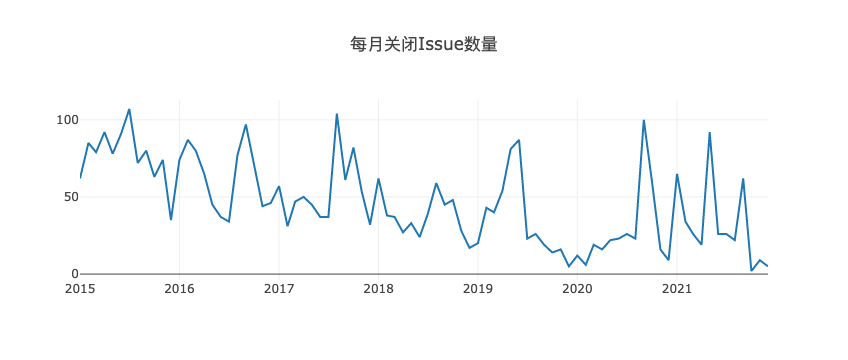

In [61]:
var startYear = 2015,
  endYear = 2021;
var years = [];
var repo_id = 3228505;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('任务2.2');
Promise.all(
  years.map((year) => {
    return query(`
    select issue_closed_at
    from github_log.events
    where repo_id=${repo_id} and type = 'PullRequestEvent' and toYear (created_at) = ${year}
    `);
  })
).then((data) => {
  const tmp = {};
  let issumeAverageDuration = 0;
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
        if(data[i][j].issue_closed_at != null){
      if (data[i][j].issue_closed_at.slice(0, 4) !== "1970") { 
        if (tmp.hasOwnProperty(data[i][j].issue_closed_at.slice(0, 7))) {
          tmp[data[i][j].issue_closed_at.slice(0, 7)] += 1;
        } else {
          tmp[data[i][j].issue_closed_at.slice(0, 7)] = 1;
        }
      }
        }
    }
  }
  const ordered = Object.fromEntries(Object.entries(tmp).sort());
  let timeArray = [];
  let countArray = [];
  for (const key in ordered) {
    timeArray.push(key);
    countArray.push(ordered[key]);
  }
    for (let i = 0; i < timeArray.length; i++) {
    console.log("月份: " + timeArray[i]);
    console.log("当月关闭Issue: " + countArray[i]);
  }
  var data = [
    {
      x: timeArray,
      y: countArray,
      type: "scatter",
    },
  ];
  openDigger.render.plotly(data, { title: "每月关闭Issue数量" });
});

任务3.1
月份: 2015-01
当月打开PR: 130
月份: 2015-02
当月打开PR: 172
月份: 2015-03
当月打开PR: 162
月份: 2015-04
当月打开PR: 181
月份: 2015-05
当月打开PR: 169
月份: 2015-06
当月打开PR: 180
月份: 2015-07
当月打开PR: 219
月份: 2015-08
当月打开PR: 154
月份: 2015-09
当月打开PR: 172
月份: 2015-10
当月打开PR: 135
月份: 2015-11
当月打开PR: 158
月份: 2015-12
当月打开PR: 79
月份: 2016-01
当月打开PR: 135
月份: 2016-02
当月打开PR: 174
月份: 2016-03
当月打开PR: 158
月份: 2016-04
当月打开PR: 142
月份: 2016-05
当月打开PR: 90
月份: 2016-06
当月打开PR: 78
月份: 2016-07
当月打开PR: 76
月份: 2016-08
当月打开PR: 151
月份: 2016-09
当月打开PR: 175
月份: 2016-10
当月打开PR: 159
月份: 2016-11
当月打开PR: 89
月份: 2016-12
当月打开PR: 88
月份: 2017-01
当月打开PR: 106
月份: 2017-02
当月打开PR: 72
月份: 2017-03
当月打开PR: 101
月份: 2017-04
当月打开PR: 99
月份: 2017-05
当月打开PR: 99
月份: 2017-06
当月打开PR: 84
月份: 2017-07
当月打开PR: 81
月份: 2017-08
当月打开PR: 212
月份: 2017-09
当月打开PR: 119
月份: 2017-10
当月打开PR: 158
月份: 2017-11
当月打开PR: 122
月份: 2017-12
当月打开PR: 67
月份: 2018-01
当月打开PR: 114
月份: 2018-02
当月打开PR: 81
月份: 2018-03
当月打开PR: 70
月份: 2018-04
当月打开PR: 60
月份: 2018-05
当月打开PR: 67
月份: 2018-06
当月打开PR: 50
月份:

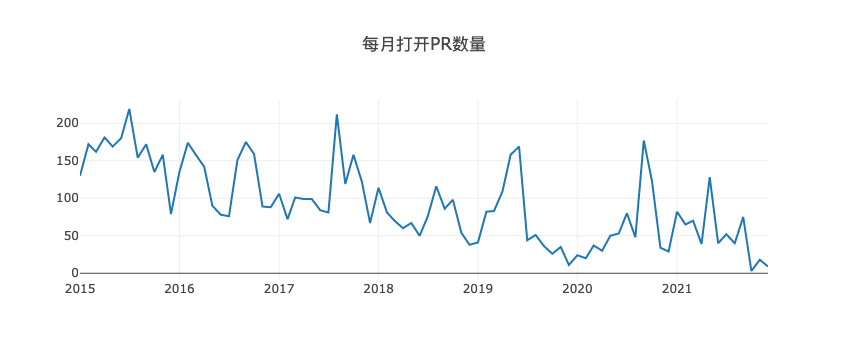

In [62]:
var startYear = 2015,
  endYear = 2021;
var years = [];
var repo_id = 3228505;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('任务3.1');
Promise.all(
  years.map((year) => {
    return query(`
    select created_at
    from github_log.events
    where repo_id=${repo_id} and type = 'PullRequestEvent' and toYear (created_at) = ${year}
    `);
  })
).then((data) => {
    const tmp = {};
    for (let i = 0; i < data.length; i++) {
      for (let j = 0; j < data[i].length; j++) {
        if (tmp.hasOwnProperty(data[i][j].created_at.slice(0, 7))) {
          tmp[data[i][j].created_at.slice(0, 7)] += 1;
        } else {
          tmp[data[i][j].created_at.slice(0, 7)] = 1;
        }
      }
    }
    const ordered = Object.fromEntries(Object.entries(tmp).sort());
    let timeArray = [];
    let countArray = [];
    for (const key in ordered) {
      timeArray.push(key);
      countArray.push(ordered[key]);
    }
    for (let i = 0; i < timeArray.length; i++) {
    console.log("月份: " + timeArray[i]);
    console.log("当月打开PR: " + countArray[i]);
  }
    var data = [
      {
        x: timeArray,
        y: countArray,
        type: 'scatter'
      },
    ];
    openDigger.render.plotly(data, {title: '每月打开PR数量'});
});

任务3.2
月份: 2015-01
当月合并PR: 55
月份: 2015-02
当月合并PR: 68
月份: 2015-03
当月合并PR: 61
月份: 2015-04
当月合并PR: 81
月份: 2015-05
当月合并PR: 63
月份: 2015-06
当月合并PR: 78
月份: 2015-07
当月合并PR: 90
月份: 2015-08
当月合并PR: 61
月份: 2015-09
当月合并PR: 60
月份: 2015-10
当月合并PR: 40
月份: 2015-11
当月合并PR: 58
月份: 2015-12
当月合并PR: 24
月份: 2016-01
当月合并PR: 47
月份: 2016-02
当月合并PR: 72
月份: 2016-03
当月合并PR: 56
月份: 2016-04
当月合并PR: 52
月份: 2016-05
当月合并PR: 36
月份: 2016-06
当月合并PR: 24
月份: 2016-07
当月合并PR: 27
月份: 2016-08
当月合并PR: 59
月份: 2016-09
当月合并PR: 46
月份: 2016-10
当月合并PR: 30
月份: 2016-11
当月合并PR: 35
月份: 2016-12
当月合并PR: 36
月份: 2017-01
当月合并PR: 39
月份: 2017-02
当月合并PR: 23
月份: 2017-03
当月合并PR: 33
月份: 2017-04
当月合并PR: 43
月份: 2017-05
当月合并PR: 39
月份: 2017-06
当月合并PR: 30
月份: 2017-07
当月合并PR: 25
月份: 2017-08
当月合并PR: 85
月份: 2017-09
当月合并PR: 42
月份: 2017-10
当月合并PR: 50
月份: 2017-11
当月合并PR: 44
月份: 2017-12
当月合并PR: 23
月份: 2018-01
当月合并PR: 54
月份: 2018-02
当月合并PR: 33
月份: 2018-03
当月合并PR: 30
月份: 2018-04
当月合并PR: 17
月份: 2018-05
当月合并PR: 22
月份: 2018-06
当月合并PR: 19
月份: 2018-07
当月合并PR: 29
月份: 2

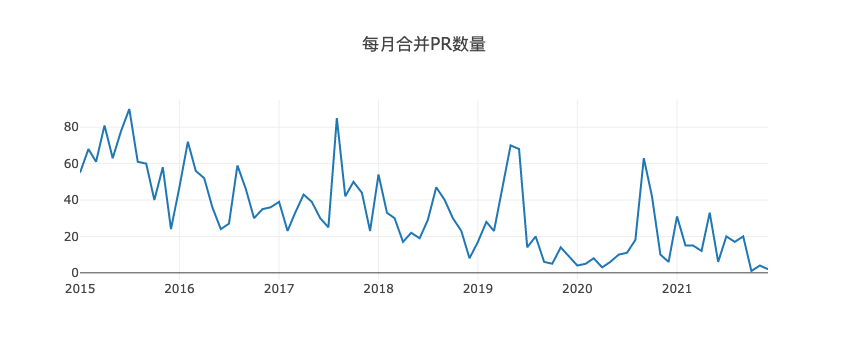

In [64]:
var startYear = 2015,
  endYear = 2021;
var years = [];
var repo_id = 3228505;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log("任务3.2");
Promise.all(
  years.map((year) => {
    return query(`
    select pull_merged_at
    from github_log.events
    where repo_id=${repo_id} and type = 'PullRequestEvent'  and toYear (created_at) = ${year}
    `);
  })
).then((data) => {
  const tmp = {};
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      if (data[i][j].pull_merged_at != null && data[i][j].pull_merged_at.slice(0, 4) !== "1970") {
        if (tmp.hasOwnProperty(data[i][j].pull_merged_at.slice(0, 7))) {
          tmp[data[i][j].pull_merged_at.slice(0, 7)] += 1;
        } else {
          tmp[data[i][j].pull_merged_at.slice(0, 7)] = 1;
        }
      }
    }
  }
  const ordered = Object.fromEntries(Object.entries(tmp).sort());
  let timeArray = [];
  let countArray = [];
  for (const key in ordered) {
    timeArray.push(key);
    countArray.push(ordered[key]);
  }
  for (let i = 0; i < timeArray.length; i++) {
    console.log("月份: " + timeArray[i]);
    console.log("当月合并PR: " + countArray[i]);
  }
  var data = [
    {
      x: timeArray,
      y: countArray,
      type: "scatter",
    },
  ];
  openDigger.render.plotly(data, { title: "每月合并PR数量" });
});

任务4
月份: 2015-01
当月活跃开发者: 1525
月份: 2015-02
当月活跃开发者: 1715
月份: 2015-03
当月活跃开发者: 1801
月份: 2015-04
当月活跃开发者: 1832
月份: 2015-05
当月活跃开发者: 2117
月份: 2015-06
当月活跃开发者: 3339
月份: 2015-07
当月活跃开发者: 2318
月份: 2015-08
当月活跃开发者: 1627
月份: 2015-09
当月活跃开发者: 1687
月份: 2015-10
当月活跃开发者: 1803
月份: 2015-11
当月活跃开发者: 2132
月份: 2015-12
当月活跃开发者: 2189
月份: 2016-01
当月活跃开发者: 2068
月份: 2016-02
当月活跃开发者: 1803
月份: 2016-03
当月活跃开发者: 2107
月份: 2016-04
当月活跃开发者: 2071
月份: 2016-05
当月活跃开发者: 1709
月份: 2016-06
当月活跃开发者: 1569
月份: 2016-07
当月活跃开发者: 1453
月份: 2016-08
当月活跃开发者: 1822
月份: 2016-09
当月活跃开发者: 1680
月份: 2016-10
当月活跃开发者: 1781
月份: 2016-11
当月活跃开发者: 1673
月份: 2016-12
当月活跃开发者: 1451
月份: 2017-01
当月活跃开发者: 1683
月份: 2017-02
当月活跃开发者: 1605
月份: 2017-03
当月活跃开发者: 1654
月份: 2017-04
当月活跃开发者: 1378
月份: 2017-05
当月活跃开发者: 1769
月份: 2017-06
当月活跃开发者: 1597
月份: 2017-07
当月活跃开发者: 1679
月份: 2017-08
当月活跃开发者: 2123
月份: 2017-09
当月活跃开发者: 2055
月份: 2017-10
当月活跃开发者: 1779
月份: 2017-11
当月活跃开发者: 1667
月份: 2017-12
当月活跃开发者: 1402
月份: 2018-01
当月活跃开发者: 1372
月份: 2018-02
当月活跃开发者: 1366
月份: 2018

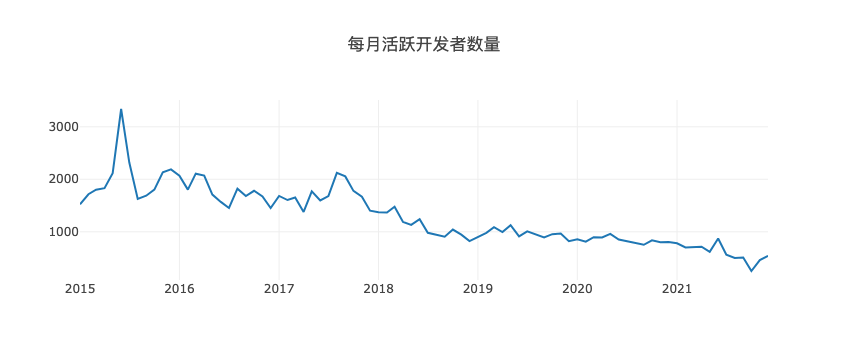

In [65]:
var startYear = 2015,
  endYear = 2021;
var years = [];
var repo_id = 3228505;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('任务4');
Promise.all(
  years.map((year) => {
    return query(`
    select created_at, actor_id
    from github_log.events
    where repo_id=${repo_id}  and toYear (created_at) = ${year}
    `);
  })
).then((data) => {
  var tmp = new Map();
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      if (!tmp.has(data[i][j].created_at.slice(0, 7))) {
        tmp.set(data[i][j].created_at.slice(0, 7), [data[i][j].actor_id]);
      } else {
        tmp.set(data[i][j].created_at.slice(0, 7), [
          data[i][j].actor_id,
          ...tmp.get(data[i][j].created_at.slice(0, 7)),
        ]);
      }
    }
  }
  let timeArray = [];
  let countArray = [];
  const tmpPair = {};
  for (let key of tmp) {
    let tmpCount = new Set(key[1]).size;
    tmpPair[key[0]] = tmpCount;
  }
  const ordered = Object.fromEntries(Object.entries(tmpPair).sort()); // sort by date
  for(let key in ordered) {
      timeArray.push(key);
      countArray.push(ordered[key]);
  }
  for (let i = 0; i < timeArray.length; i++) {
    console.log("月份: " + timeArray[i]);
    console.log("当月活跃开发者: " + countArray[i]);
  }
  var data = [
    {
      x: timeArray,
      y: countArray,
      type: "scatter",
    },
  ];
  openDigger.render.plotly(data, { title: "每月活跃开发者数量" });
});

In [67]:
var startYear = 2015,
  endYear = 2021;
var years = [];
var repo_id = 3228505;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
  years.map((year) => {
    return query(`
    select issue_id, issue_created_at, issue_closed_at
    from github_log.events
    where repo_id=${repo_id} and type = 'PullRequestEvent' and toYear (created_at) = ${year}
    `);
  })
).then((data) => {
  let issueDurationArray = [];
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      if (data[i][j].issue_closed_at != null && data[i][j].issue_closed_at.slice(0, 4) !== "1970") {
        const oneDay = 24 * 60 * 60 * 1000;
        var startTime = Date.parse(data[i][j].issue_created_at.slice(0, 10));
        var closeTime = Date.parse(data[i][j].issue_closed_at.slice(0, 10));
        const duration = Math.round(Math.abs((startTime - closeTime) / oneDay));
        issueDurationArray.push(duration);
      }
    }
  }
  issueDurationArray.sort();
  let middleValueOfissueDuration =
    issueDurationArray[Math.floor(issueDurationArray.length / 2)];
  let aveageValueOfissueDuration =
    issueDurationArray.reduce((a, b) => a + b, 0) / issueDurationArray.length;
  console.log('任务5');
  console.log("以下结果去除了没有关闭的Issue");
  console.log(
    "Issue 从打开到关闭的平均时长为 " + aveageValueOfissueDuration.toFixed(2) + "天"
  );
  console.log(
    "Issue 从打开到关闭的中位数时长为 " + middleValueOfissueDuration + "天"
  );
});

任务5
以下结果去除了没有关闭的Issue
Issue 从打开到关闭的平均时长为 68.47天
Issue 从打开到关闭的中位数时长为 1天


In [68]:
var startYear = 2015,
endYear = 2022;
var years = [];
var repo_id = 3228505;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('任务6的前序准备');
Promise.all(
  years.map((year) => {
    return query(`
    select issue_id, created_at
    from github_log.events
    where repo_id=${repo_id} and type = 'PullRequestEvent' and action = 'opened' and toYear (created_at) = ${year}
    `);
  })
).then((data) => {
    // let count = 0;
    let prOpenDic = {};
    for(let i = 0; i < data.length; i++) {
        for(let j = 0; j < data[i].length; j++) {
            if (data[i][j].created_at.slice(0, 4) !== '1970') {
                prOpenDic[data[i][j].issue_id] = data[i][j].created_at;
                // count += 1;
            }
        }
    }
    // console.log(prOpenDic);
    // console.log(count);
    const prOpenDicJSON = JSON.stringify(prOpenDic);
    fs.writeFile('prOpen.json', prOpenDicJSON, (err) => {
        if (err) {
            console.log(err);
        }
    })
});

任务6的前序准备


In [70]:
var startYear = 2015,
  endYear = 2022;
var years = [];
var repo_id = 3228505;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log("任务6");
Promise.all(
  years.map((year) => {
    return query(`
          select issue_id, pull_merged_at
          from github_log.events
          where repo_id=${repo_id} and type = 'PullRequestEvent' and toYear (created_at) = ${year}
          `);
  })
).then((data) => {
  let prMergeDic = {};
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      if (data[i][j].pull_merged_at != null && data[i][j].pull_merged_at.slice(0, 4) !== "1970") {
        prMergeDic[data[i][j].issue_id] = data[i][j].pull_merged_at;
      }
    }
  }
  fs.readFile("prOpen.json", "utf-8", (err, data) => {
    if (err) {
      console.log(err);
    }
    let PRdurationArray = [];
    let prOpen = JSON.parse(data.toString());
    for (let MergeId in prMergeDic) {
      for (let OpenId in prOpen) {
        if (MergeId === OpenId) {
          const oneDay = 24 * 60 * 60 * 1000;
          let openTime = Date.parse(prOpen[OpenId].slice(0, 10));
          let mergeTime = Date.parse(prMergeDic[MergeId].slice(0, 10));
          const duration = Math.round(
            Math.abs((mergeTime - openTime) / oneDay)
          );
          PRdurationArray.push(duration);
        }
      }
    }
    PRdurationArray.sort();
    let middleValueOfPRDuration =
      PRdurationArray[Math.floor(PRdurationArray.length / 2)];
    let aveageValueOfPRDuration =
      PRdurationArray.reduce((a, b) => a + b, 0) / PRdurationArray.length;
    console.log(
      "PR 从打开到合并的平均时长为 " + aveageValueOfPRDuration.toFixed(2) + "天"
    );
    console.log(
      "PR 从打开到合并的中位数时长为 " + middleValueOfPRDuration + "天"
    );
  });
});

任务6
PR 从打开到合并的平均时长为 20.37天
PR 从打开到合并的中位数时长为 1天


In [72]:
var startYear = 2015,
  endYear = 2020;
var years = [];
var repo_id = 3228505;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
  years.map((year) => {
    return query(`
    select issue_id, issue_created_at, issue_comment_created_at
    from github_log.events
    where repo_id=${repo_id} and toYear (created_at) = ${year}
    `);
  })
).then((data) => {
  // console.log(data);
  const tmp = {};
  let issumeFirstCommentArray = [];
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      if (
        data[i][j].issue_id !== "0" && data[i][j].issue_comment_created_at != null &&
        data[i][j].issue_comment_created_at.slice(0, 4) !== "1970"
      ) {
        // 去除无效数据
        if (!tmp.hasOwnProperty(data[i][j].issue_id)) {
          // first comment
          tmp[data[i][j].issue_id] = 1;
          const oneDay = 24 * 60 * 60 * 1000;
          let issueCreatedTime = Date.parse(
            data[i][j].issue_created_at.slice(0, 10)
          );
          let issueFirstCommentTime = Date.parse(
            data[i][j].issue_comment_created_at.slice(0, 10)
          );
          const duration = Math.round(
            Math.abs((issueCreatedTime - issueFirstCommentTime) / oneDay)
          );
          issumeFirstCommentArray.push(duration);
        }
      }
    }
  }
  issumeFirstCommentArray.sort();
  let middleValueOfissueFirstCommentDuration =
    issumeFirstCommentArray[Math.floor(issumeFirstCommentArray.length / 2)];
  let aveageValueOfissueFirstCommentDuration =
    issumeFirstCommentArray.reduce((a, b) => a + b, 0) /
    issumeFirstCommentArray.length;
  console.log("任务7.1");
  console.log("以下结果去除了没有关闭的Issue");
  console.log(
    "Issue 从打开到第一次被评论的平均时长为 " +
      aveageValueOfissueFirstCommentDuration.toFixed(2) +
      "天"
  );
  console.log(
    "Issue 从打开到第一次被评论的中位数时长为 " +
      middleValueOfissueFirstCommentDuration +
      "天"
  );
});

任务7.1
以下结果去除了没有关闭的Issue
Issue 从打开到第一次被评论的平均时长为 297.49天
Issue 从打开到第一次被评论的中位数时长为 1天


In [73]:
var startYear = 2015,
  endYear = 2020;
var years = [];
var repo_id = 3228505;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
  years.map((year) => {
    return query(`
    select issue_id, pull_review_comment_created_at
    from github_log.events
    where repo_id=${repo_id} and toYear (created_at) = ${year}
    `);
  })
).then((data) => {
  let prCommentDic = {};
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      if (
        data[i][j].issue_id !== "0" && data[i][j].pull_review_comment_created_at != null &&
        data[i][j].pull_review_comment_created_at.slice(0, 4) !== "1970"
      ) {
        prCommentDic[data[i][j].issue_id] = data[i][j].pull_review_comment_created_at;
        }
      }
    }
    fs.readFile("prOpen.json", "utf-8", (err, data) => {
        if (err) {
          console.log(err);
        }
        let prCommentArray = [];
        let prOpen = JSON.parse(data.toString());
        for(let CommentId in prCommentDic) {
            for(let OpenId in prOpen) {
                if (OpenId === CommentId) {
                    const oneDay = 24 * 60 * 60 * 1000;
                    let openTime = Date.parse(prOpen[OpenId].slice(0, 10));
                    let commentTime = Date.parse(prCommentDic[CommentId].slice(0, 10));
                    const duration = Math.round(
                      Math.abs((commentTime - openTime) / oneDay)
                    );
                    prCommentArray.push(duration);
                }
            }
        }
        prCommentArray.sort();
      let middleValueOfPRFirstCommentDuration =
      prCommentArray[Math.floor(prCommentArray.length / 2)];
      let aveageValueOfPRFirstCommentDuration =
      prCommentArray.reduce((a, b) => a + b, 0) /
      prCommentArray.length;
      console.log("任务7.2");
      console.log(
        "PR 从打开到第一次被评论的平均时长为 " +
        aveageValueOfPRFirstCommentDuration.toFixed(2) +
          "天"
      );
      console.log(
        "PR 从打开到第一次被评论的中位数时长为 " +
        middleValueOfPRFirstCommentDuration +
          "天"
      );
        })
});

任务7.2
PR 从打开到第一次被评论的平均时长为 16.87天
PR 从打开到第一次被评论的中位数时长为 1天


In [75]:
var startYear = 2015,
  endYear = 2020;
var years = [];
var repo_id = 3228505;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
  years.map((year) => {
    return query(`
    select issue_id, release_published_at
    from github_log.events
    where repo_id=${repo_id} and toYear (created_at) = ${year}
    `);
  })
).then((data) => {
  let count = 0;
  let releaseDic = {};
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      if (data[i][j].release_published_at != null && data[i][j].release_published_at.slice(0, 4) !== "1970") {
        count += 1;
        if (
          releaseDic.hasOwnProperty(data[i][j].release_published_at.slice(0, 4))
        ) {
          releaseDic[data[i][j].release_published_at.slice(0, 4)] += 1;
        } else {
          releaseDic[data[i][j].release_published_at.slice(0, 4)] = 1;
        }
      }
    }
  }
  console.log("任务8 我们认为项目release发布的次数值得关注");
  console.log("该项目release发布了 " + count + "次");
  for (let year in releaseDic) {
    console.log("其中 " + year + "年发布了 " + releaseDic[year] + "次");
  }
});

任务8 我们认为项目release发布的次数值得关注
该项目release发布了 413次
其中 2015年发布了 104次
其中 2016年发布了 107次
其中 2017年发布了 83次
其中 2018年发布了 59次
其中 2019年发布了 35次
其中 2020年发布了 25次
